<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_21_Support_Vector_Machine(SVM_SVC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) — Machine Learning

SVM stands for support vector machine, and although it can solve both classification and regression problems, it is mainly used for classification problems in machine learning (ML). SVM models help us classify new data points based on previously classified similar data, making it is a supervised machine learning technique.

A support vector machine is in charge of building a hyperplane or set of hyperplanes in a high or infinite-dimensional space, which, in turn, can be used for classification, regression, or other tasks like outliers detection.

Intuitively, a good separation is achieved by the hyperplane with the most significant distance to the nearest training-data point of any class (so-called functional margin) since, in general, the larger the margin, the lower the generalization error of the classifier.

# Functionality of SVM
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
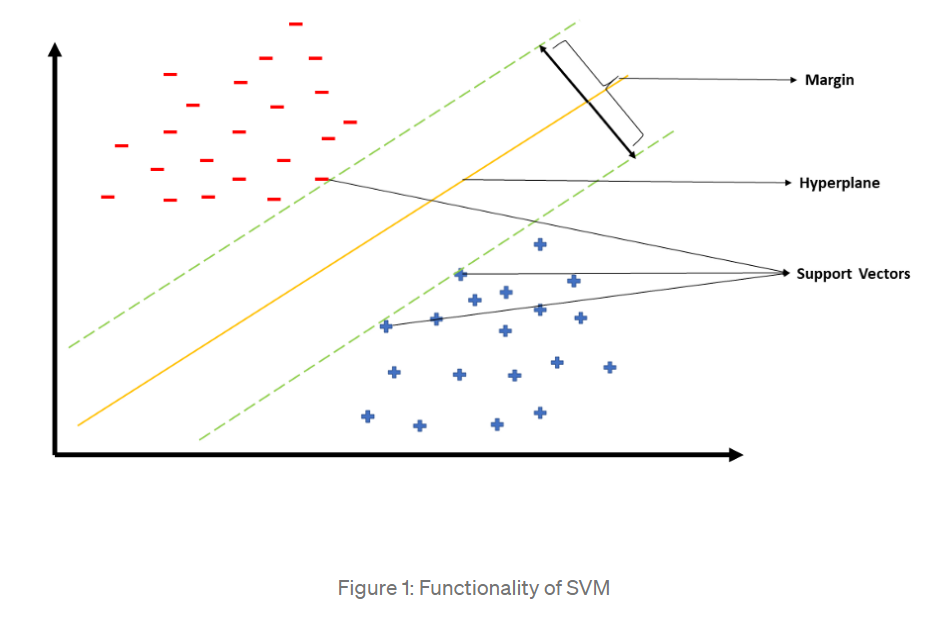

The image represents how an ideal SVM classifier looks when we visualize it on a 2-d plane. There are two classes: negative and positive, marked with the colors red and blue, respectively. The exact reason for marking them as negative and positive will be much more evident going forward. The SVM creates a plane in 2-dimensional features and a hyperplane in multidimensional features called a decision boundary.

The hyperplane separates the features and helps in classifying the new input data point based on its values. There are n-number of possible hyperplanes that can be generated, which can separate the classes and find the optimal one? That is when margin and support vectors come into play.

When the hyperplane for the decision boundary is generated, it also generated two hyperplanes called **marginal planes,** which are precisely parallel to the decision boundary such that both the marginal planes pass through at least one of the nearest points from the respective class. These nearest points through which the two marginal planes pass are called **support vectors.**

**The optimal decision boundary** is the one that has the maximum distance between two parallel marginal hyperplanes, the distance between them is known as the **margin.** Hence, the SVM algorithm works on maximizing the margin.

There are two types of classification problems concerning data distribution: **linearly separable and non-linearly separable.** Two sets are linearly separable if there exists at least one line in the plane with all of the blue points on one side of the line and all the red points on the other side.

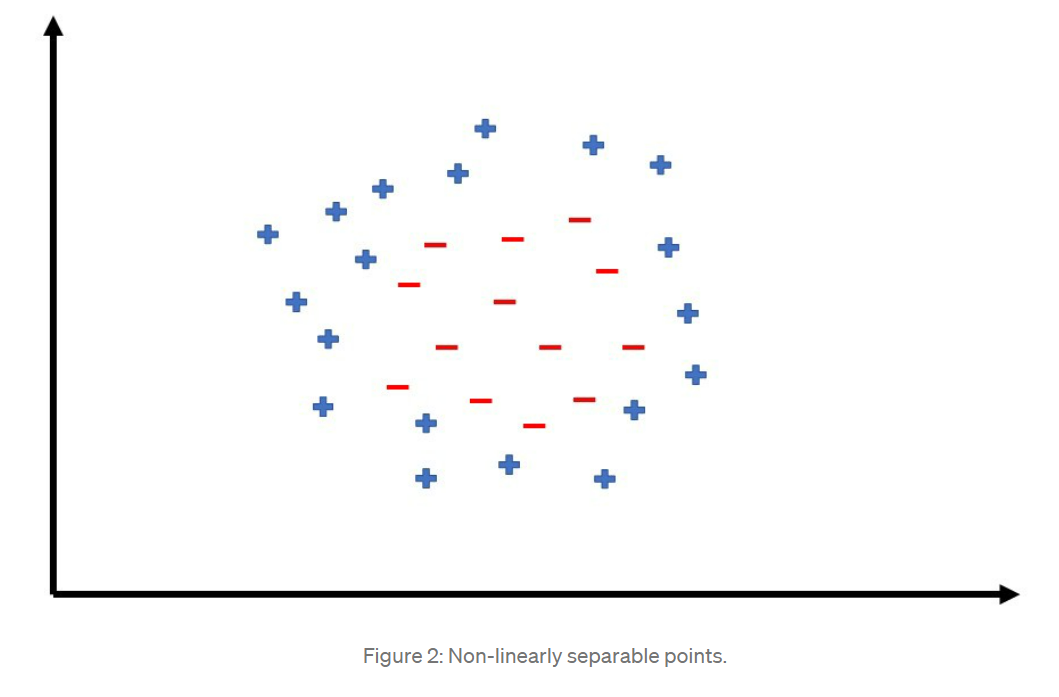

When data points cannot be separated with a straight line or a straight hyperplane, those types are known as non-linearly separable. In such a situation, SVM kernels act upon and convert low dimension into a high dimension so that the data points are linearly separable.

# SVM Use Case
1. Face Detection
2. Text and Hypertext Categorization
3. Classification of Images
4. Bioinformatics
5. Remote Homology Detection
6. Handwriting Detection


# Math behind SVM
The equation of a hyperplane is given by:

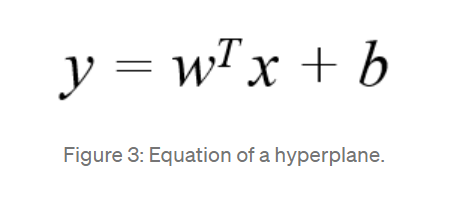

where the output y indicates whether it is in a positive class or the negative class. w is that matrix representing the plane's parameters also the coefficient of x where x is the input data. b represents the intercept of the hyperplane.

When we have multidimensional features, say p number of features, the equation expands to:

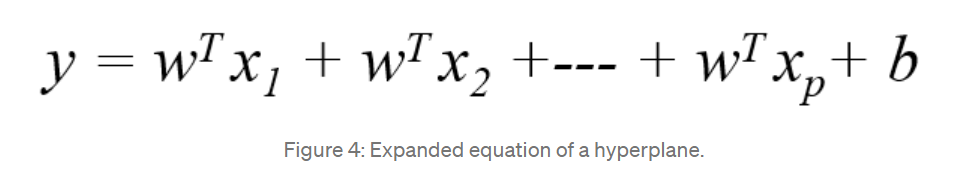

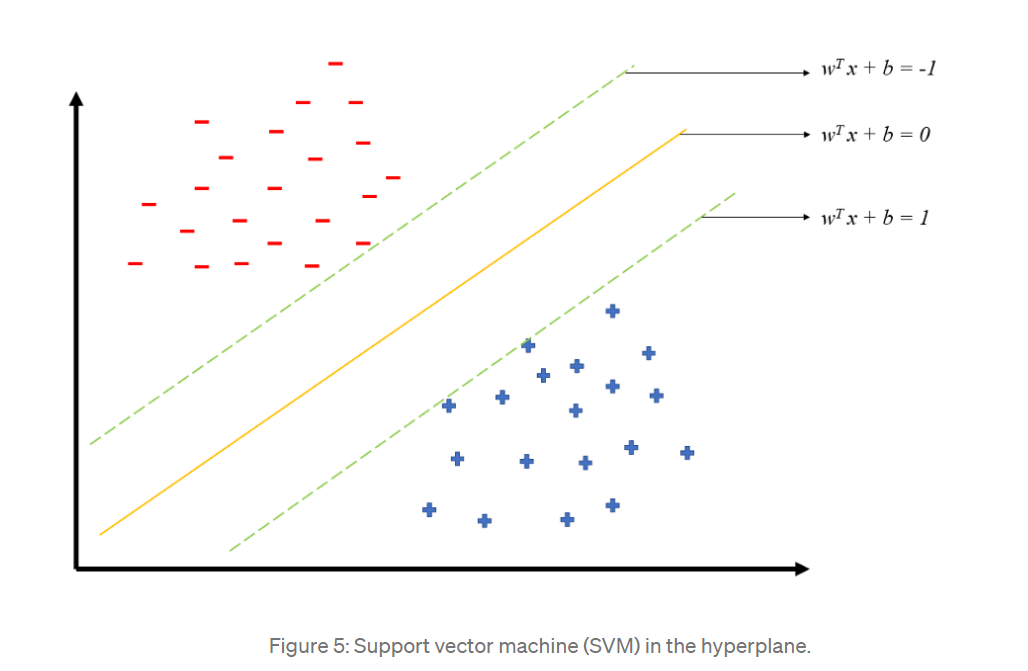

In this particular example that we have considered, we are expecting the output of the classifier equation to be either a positive number indicating the data point belongs to a positive class or a negative number indicating the data point belongs to a negative class. If any point exactly on the decision boundary, then the output of the classifier would be zero, and hence, the equation of the decision boundary is:

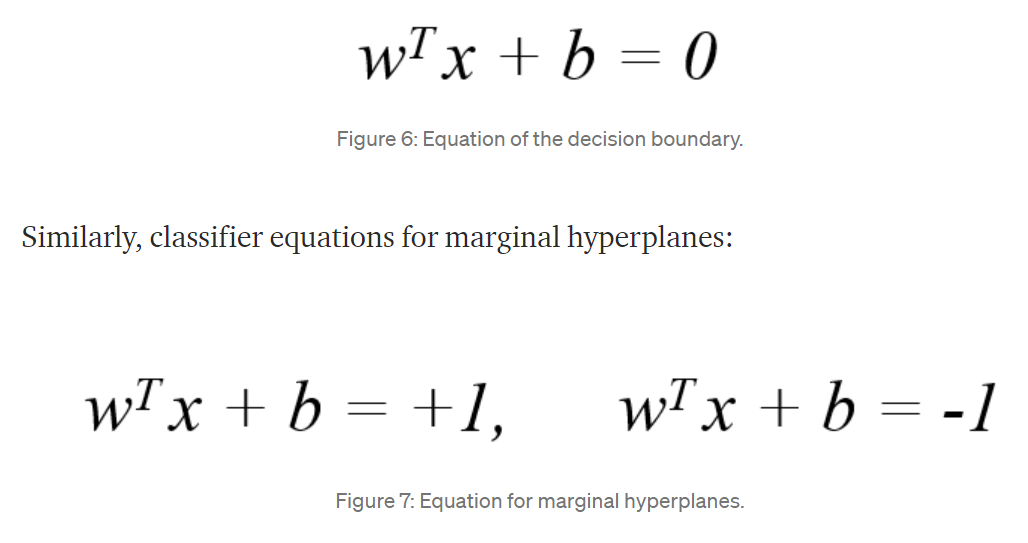

Let’s not blindly believe in it. We shall go ahead and derive why the output of the equation is either positive or negative.

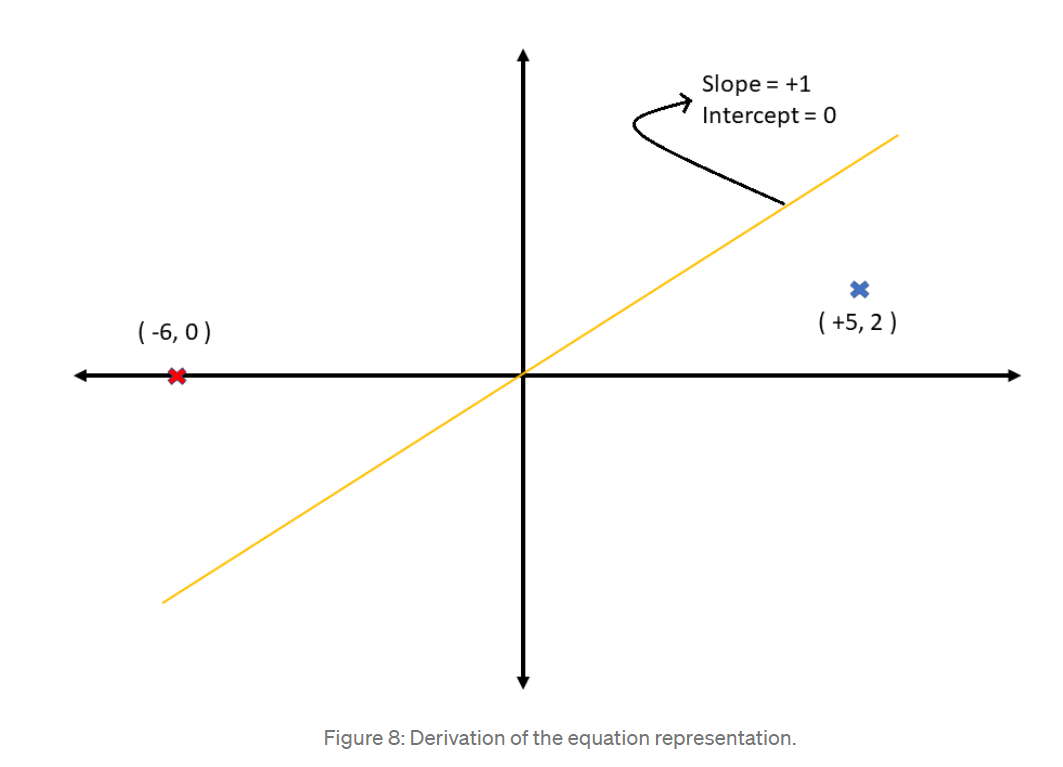

Consider the above problem where the decision boundary passes through the origin and hence intercept is zero and its slope is +1. A single data point on each side of the hyperplane represents both the positive and negative classes. Substituting the values in the equation of the hyperplane:

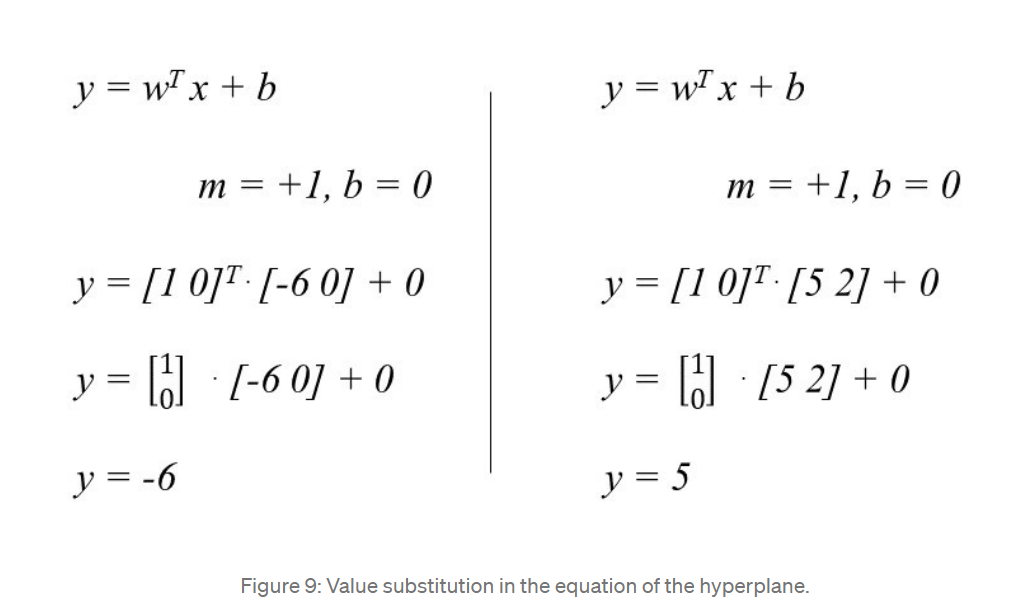

Any point below the hyperplane will always be positive, and above the hyperplane will be negative.

Next, the margin has to be maximized to find the optimal decision boundary. Consider the negative support vector as point x1 and the positive support vector as point x2. The margin would be simply the difference between x1 and x2. Let’s arrive at this equation with the help of solving the linear equations. Mathematically, we have two equations with two unknowns (x1 and x2). To find the unknowns, subtract one equation from another.

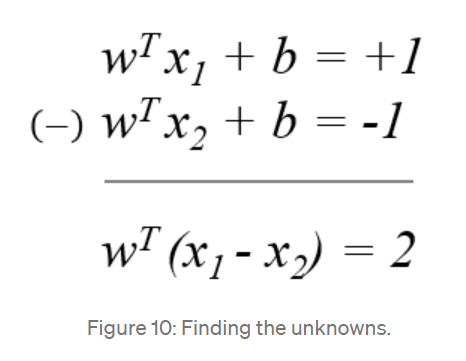

To find x1-x2, w has to be sent to the equation's left-hand side, which gives 2 over w. It is already known that w is a vector, and vectors can not be divided directly like a scalar value. The equivalent would be to divide both sides by the length of w, that is, the magnitude of that norm of w.

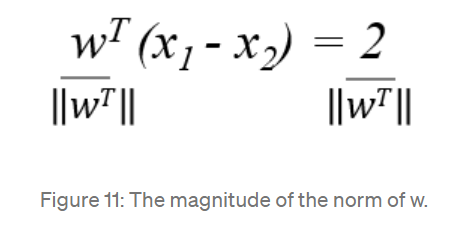

When w is divided by its normal form, it still points in the same direction, but the magnitude would be 1 unit equivalent to scalar 1. Hence

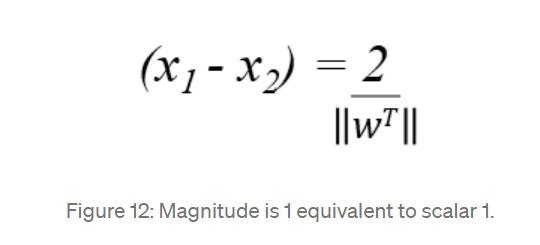

Now that we have arrived at the equation for the margin, it is considered the optimization function that needs to be maximized using optimization algorithms like gradient descent. Optimization algorithms work best when finding the local minimum, hence to ease the problem, minimizing the reciprocal of x1-x2 can be used as an optimization function, which is the norm of w over 2.

It is also possible that the SVM model can have some percentage of error, meaning, misclassification of new data, and that has to be integrated into our optimization function, where Ci indicates the number of error points, in other words, the number of misclassified data points and summation of the distance between the marginal hyperplane and the misclassified data point.

# Terminology Alert

1. Hard Margin: The margin which is intolerant to any errors is known as hard margin. It is sensitive to outliers, and a single outlier can affect the decision boundary.

2. Soft Margin: The margin which can consider some percentage of error is known as soft margin. Insensitive to outliers.

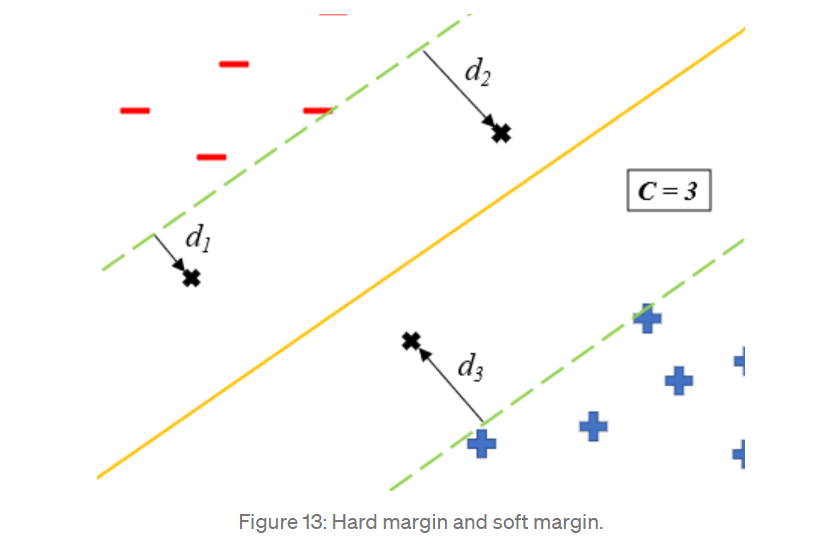

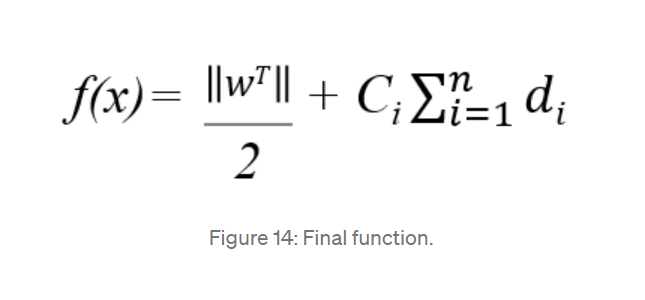

# SVM Kernels
SVM is easy when building a hyperplane for linearly separable data points. However, it is much more challenging when the data is non-linearly separable. As discussed, SVM kernels help in converting low dimensional non-linearly separable data points into high dimensional linearly separable data points. There are three popularly known SVM kernels:

1. Polynomial
2. Radial Basis Function (RBF)
3. Sigmoid

Let’s build upon the intuition of how kernels work by converting 1-d non-linearly separable data into 2-d linearly separable data.

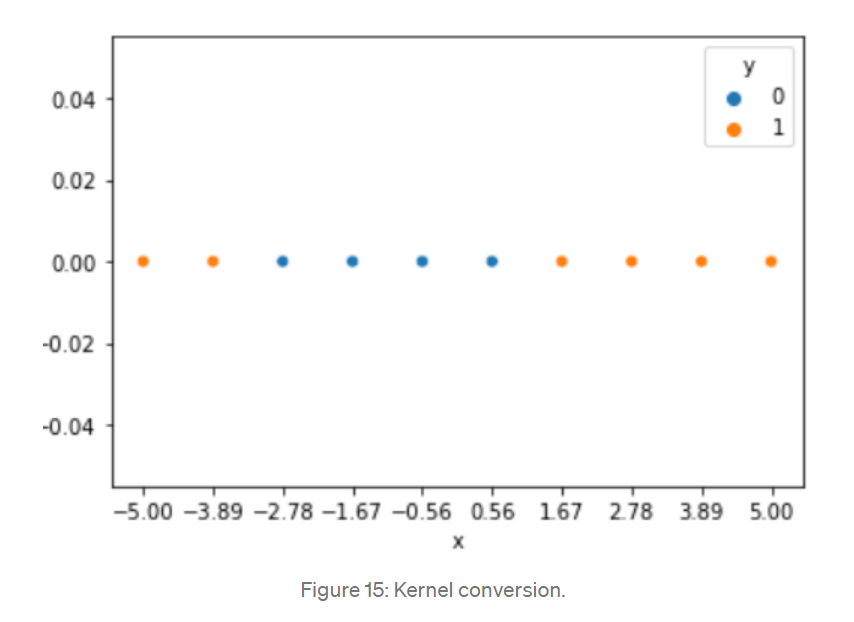

Consider the above data points, and it is an example of the binary classification ( 1 and 0). It is impossible to draw a linear line that can separate the two classes. Applying a transformation on each point will convert 1-d data points into 2-d, helping build a decision boundary. Here, the transformation function would be:



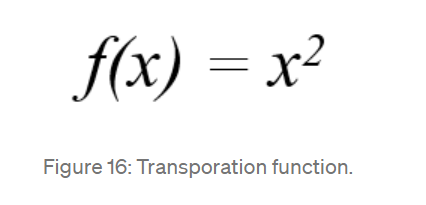

That is, square each of the data points and plot the result as the second dimension (y-axis).

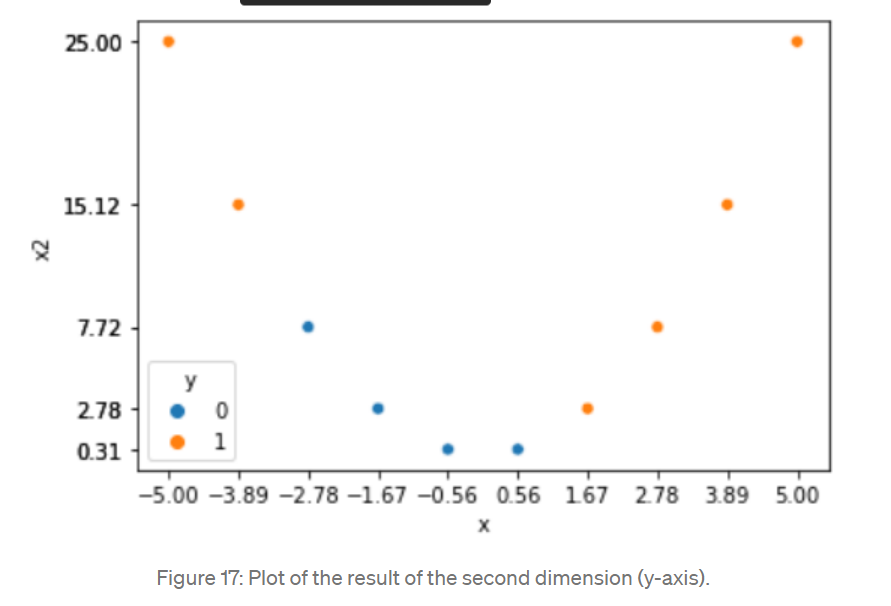

Original data points are plotted on the x-axis, and transformed data points(x-square) are plotted on the y-axis. Now, the data points are easily separable by drawing a linear hyperplane. Visualizing higher dimensional data points would be challenging. However, SVM kernels work similarly with higher dimensional data points, too, convert low dimensional data into high dimensional data so that they transform into linearly separable datapoints.

# Implementation
Implementation in python is pretty straightforward. Python being open source provides us ready-made packages to implement several machine learning algorithms, and SVM is no exception. Using the SVC package from sklearn provides several advantages and flexibility. SVC stands for Support Vector Classification, and the implementation is based on libsvm and a wrapper around SVM. Let’s import the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#classic datasets from sklearn library
from sklearn import datasets
from sklearn.model_selection import train_test_split
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
#different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

For implementation purposes, we will be using a wine dataset. It is a multiclass dataset with 3 classes, 178 total samples, and 13 features. This data results from a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines [4].

Let’s load the wine data from the sklearn library. Since the data is being loaded from sklearn, it would be easier to work with it if we store it into a DataFrame.

In [2]:
#loading WINE dataset
cancer_data = datasets.load_wine()
#storing into DataFrame
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df['target'] = cancer_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Performing analysis by plotting graphs will help in understanding the dataset better. It is always advised to check if data is balanced, that is, if all the target classes have the same number of records.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


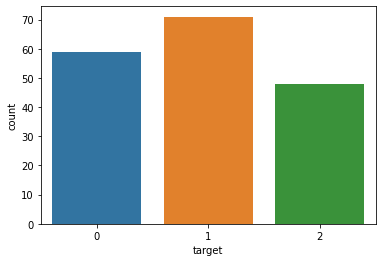

In [3]:
#analysing target variable
sns.countplot(df.target)
plt.show()

Along with being a multiclass classification problem, it also represents an imbalanced classification problem. Next, let’s check if our data is linearly separable or not. This will give an initial inference to decide what type of kernel will best classify the data. For simplicity, let’s plot every feature against alcohol and color the data points concerning their class.

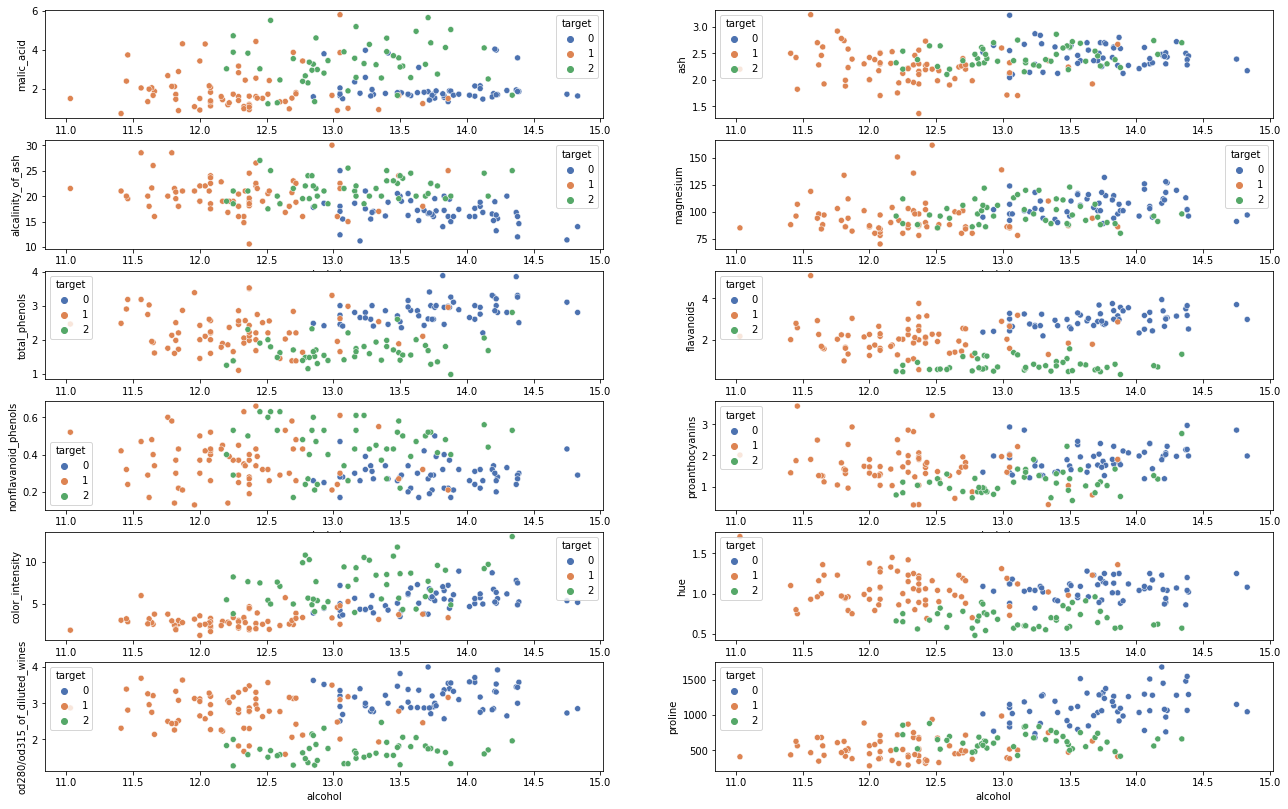

In [4]:
#visualizing datapoints separability
fig, axes = plt.subplots(6, 2, figsize=(22,14))
axes = [ax for axes_rows in axes for ax in axes_rows]
columns = list(df.columns)
columns.remove('target')
columns.remove('alcohol')
#looping through every columns of data
#and plotting against alcohol
for i, col in enumerate(columns):
   sns.scatterplot(data=df, x='alcohol', y=col, hue='target',         palette="deep", ax=axes[i])

It is clearly noticeable that the data points are linearly separable, of course with some overlapping percentage, which is an ideal case in real-world data. Building linear SVM makes more sense now. Before building any model, it is advised to split that data set into training and testing data. Training data is used to train our model, and testing is used to evaluate the trained model's performance. Ideally, 80% of the data is used for training and 20% of that testing.

In [5]:
#splitting data into 80:20 train test ratio
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train and X_test contain all the features with 80% of the rows randomly selected whereas, y_train and y_test contain only the target values of corresponding rows. Let’s build the linear SVM model using the SVC package from the sklearn library. Function predict() is used to predict the target y values of the features x data.

In [6]:
#training SVM model with linear kernel
model = SVC(kernel='linear', random_state = 10)
model.fit(X_train, y_train)
#predicting output for test data
pred = model.predict(X_test)

To evaluate the performance of a classification model confusion matrix is one of the preferred methods. It gives a visual analysis of several test data points correctly classified and misclassified by plotting predicted versus actual value graph.

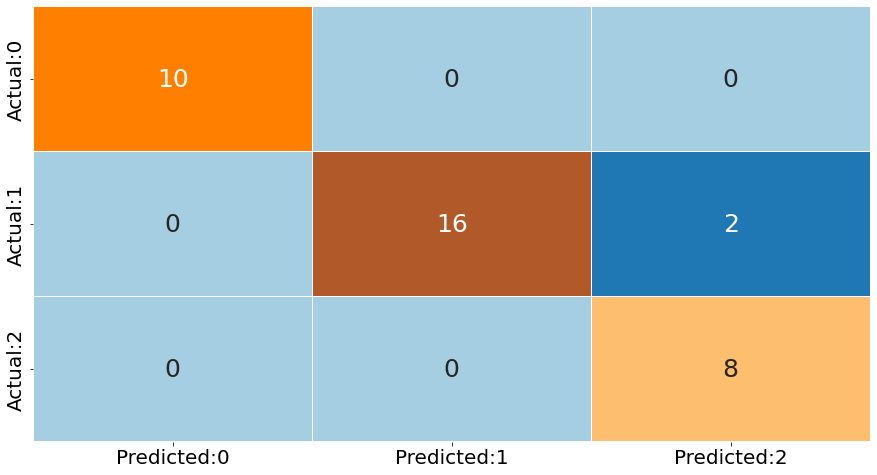

In [7]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2'], index = ['Actual:0','Actual:1', 'Actual:2'])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

0, 1, and 2 are the classes, and the graph gives the number of test data points belonging to the respective block. All the 10 data points of classes 0 and 2 are correctly predicted/classified. That is, predicted is equal to actual. Whereas 2 data points of class 1 are wrongly predicted as class 2. More inferences like precision, recall, accuracy score, f1-score, and so on. The confusion matrix can be extracted with the package classification_report.

In [8]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



The accuracy score is significant 94%. The two misclassified data from class 1 explains the loss of 6% accuracy, which is reasonably acceptable and expected.

# Hyperparameters in SVM(SVC)

Support Vector Machine (SVM) is a widely-used supervised machine learning algorithm. It is mostly used in classification tasks but suitable for regression tasks as well. In this post, we dive deep into two important parameters of support vector machines which are C and gamma.

 SVM creates a decision boundary which makes the distinction between two or more classes. How to draw or determine the decision boundary is the most critical part in SVM algorithms. When the data points in different classes are linearly separable, it is an easy task to draw a decision boundary.

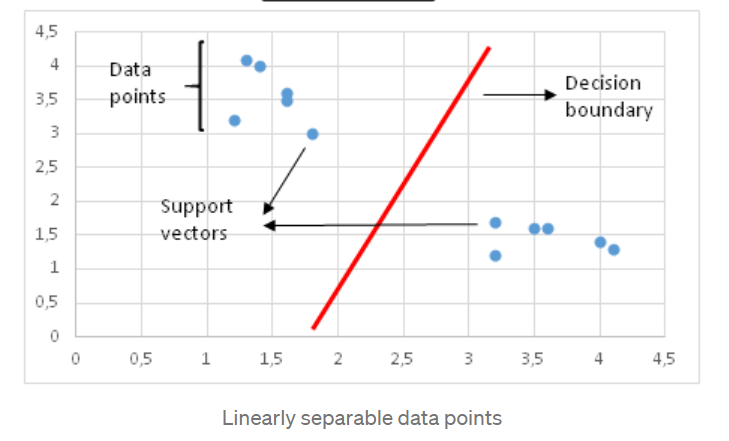

However, real data is noisy and not linearly separable in most cases. A standard SVM tries to separate all positive and negative examples (i.e. two different classes) and does not allow any points to be misclassified. This results in an overfit model or, in some cases, a decision boundary cannot be found with a standard SVM.

Consider the data points in a 2-dimensional space below:

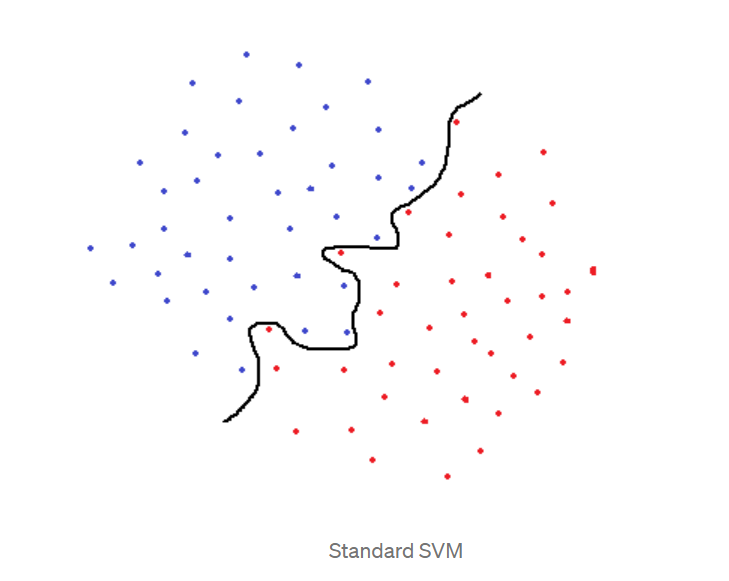

A standard SVM would try to separate blue and red classes by using the black curve line as a decision boundary. However, this is a too specific classification and highly likely to end up overfitting. An overfit SVM achieves a high accuracy with training set but will not perform well on new, previously unseen examples. This model would be very sensitive to noise and even very small changes in data point values may change the classification results. The SVM that uses this black line as a decision boundary is not generalized well to this dataset.

To overcome this issue, in 1995, Cortes and Vapnik, came up with the idea of “soft margin” SVM which allows some examples to be misclassified or be on the wrong side of decision boundary. Soft margin SVM often result in a better generalized model. In our example, the decision boundary for soft margin SVM might look like the black straight line as below:

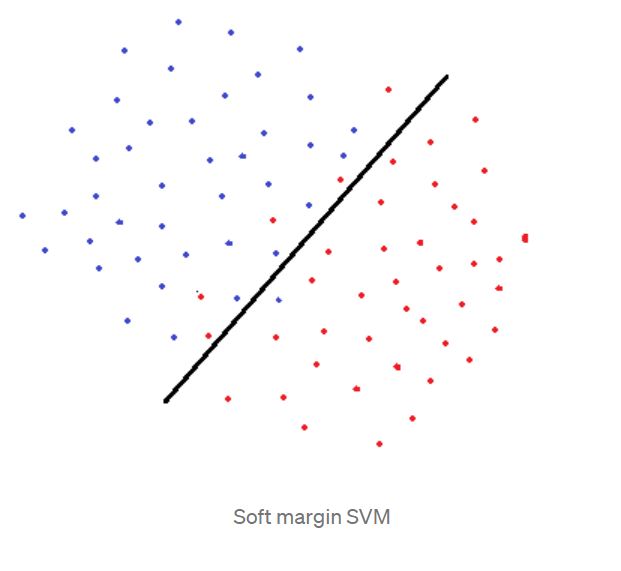

There are some misclassified points but we end up having a more generalized model. When determining the decision boundary, a soft margin SVM tries to solve an optimization problem with the following goals:

* Increase the distance of decision boundary to classes (or support vectors)
* Maximize the number of points that are correctly classified in the training set

There is obviously a trade-off between these two goals. Decision boundary might have to be very close to one particular class to correctly label all data points in training set. However, in this case, accuracy on test dataset might be lower because decision boundary is too sensitive to noise and to small changes in the independent variables. On the other hand, a decision boundary might be placed as far as possible to each class with the expense of some misclassified exceptions. This trade-off is controlled by c parameter.

C parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If c is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin. Penalty is not same for all misclassified examples. It is directly proportional to the distance to decision boundary.

Before introducing gamma parameter, we need to talk about kernel trick. In some cases, data points that are not linearly separable are transformed using kernel functions so that they become linearly separable. Kernel function is kind of a similarity measure. The inputs are original features and the output is a similarity measure in the new feature space. Similarity here means a degree of closeness. It is a costly operation to actually transform data points to a high-dimensional feature space. The algorithm does not actually transform the data points to a new, high dimensional feature space. Kernelized SVM compute decision boundaries in terms of similarity measures in a high-dimensional feature space without actually doing a transformation. I think this is why it is also called kernel trick.

One of the commonly used kernel functions is radial basis function (RBF). Gamma parameter of RBF controls the distance of influence of a single training point. Low values of gamma indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit. Following visualizations explain the concept better:

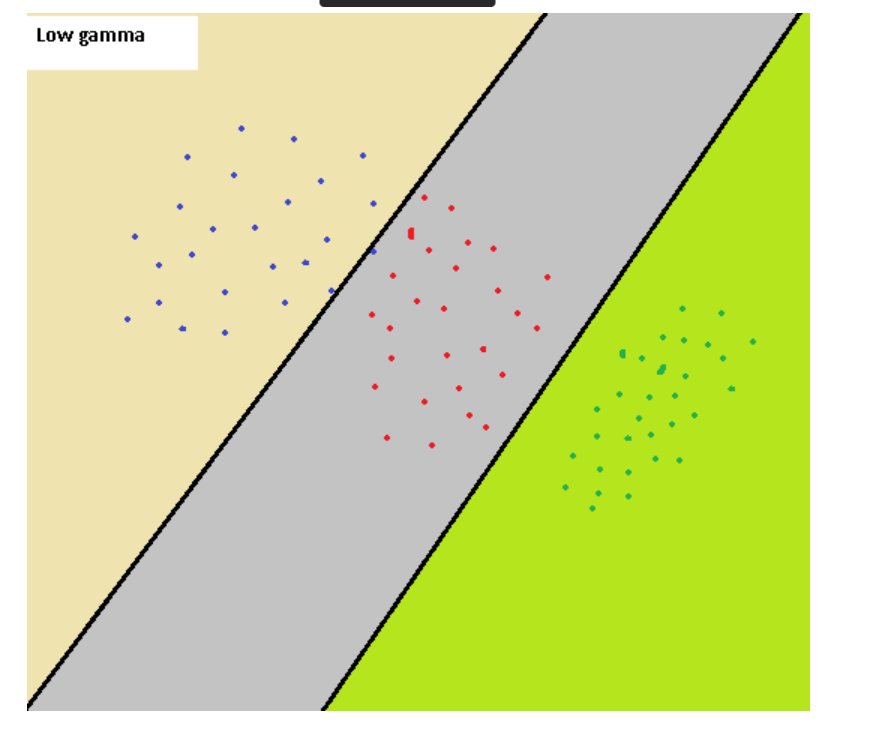

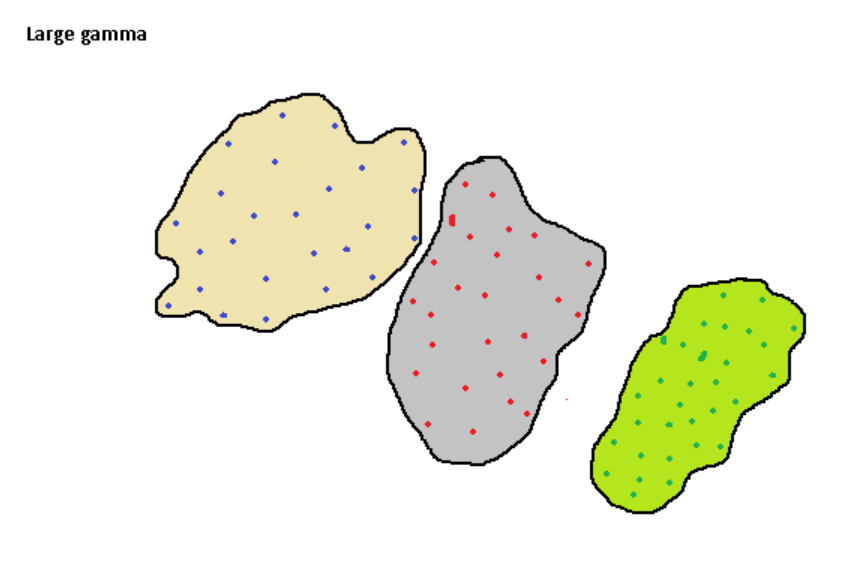

The first image represents the case with a low gamma values. Similarity radius is large so all the points in the colored regions are considered to be in the same class. For instance, if we have a point the right bottom corner, it is classified as “green” class. On the other hand, the second image is the case with large gamma. For data points to be grouped in the same class, they must fall in the tight bounded area. Thus, a small noise may cause a data point to fall out of a class. Large gamma values are likely to end up in overfitting.

As the gamma decreases, the regions separating different classes get more generalized. Very large gamma values result in too specific class regions (overfitting).

# Gamma vs C parameter
For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application:

0.0001 < gamma < 10

0.1 < c < 100

It is very significant to remember for SVM that the input data need to be normalized so that features are on the same scale and compatible.